In [1]:
from justice.util.enumerations import WelfareFunction, SSP
import pandas as pd



swf = WelfareFunction.UTILITARIAN
nfe = 50_000
ssp = SSP.SSP3
# algo = "ensgaii"
# path = f"data/temporary/NU_DATA/{algo}/{str(ssp).split('.')[1]}/"
path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

# loaded_df = pd.read_csv(
#     f"data/optimized_rbf_weights/limitarian/50k/{swf.value[1]}/{swf.value[1]}_reference_set.csv"
# )
# policy_indices = list(range(len(loaded_df)))
# print(f"Policy Indices: {policy_indices}")
# scenario_list = ["SSP119", "SSP126", "SSP245", "SSP370", "SSP434", "SSP460", "SSP534"]

print(f"Loading data from {path}...")

Loading data from data/temporary/NU_DATA/combined/SSP3/...


In [2]:
# This code creates a reference set from the different seeds

from solvers.convergence.hypervolume import get_global_reference_set, calculate_hypervolume_from_archives
import multiprocessing
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

list_of_objectives = [
    "welfare",
    "fraction_above_threshold",
]
data_path = path 

direction_of_optimization = ["min", "min"] #, "max", "max"

get_global_reference_set(
    list_of_objectives=list_of_objectives,
    data_path=data_path,
    #file_name=None,
    swf=[
        swf.value[1],
    ],
    nfe=str(nfe), # Ran for 50k number of function evaluations

    # Setting the same epsilon values as optimization process  (see analysis/analyzer.py)
    epsilons=[
        0.0001,
        0.01,
    ],
    direction_of_optimization=direction_of_optimization,
    output_data_path=path,
    saving=True,
)

## This computes the Hypervolume for the reference set

filenames = [


    # Loading Archives for the different seeds  Borg
    f"{swf.value[1]}_{nfe}_521475.tar.gz",
    f"{swf.value[1]}_{nfe}_1644652.tar.gz",
    f"{swf.value[1]}_{nfe}_3569126.tar.gz",
    f"{swf.value[1]}_{nfe}_6075612.tar.gz",

    #epsNSGA
    f"{swf.value[1]}_{nfe}_52147500.tar.gz",
    f"{swf.value[1]}_{nfe}_164465200.tar.gz",
    f"{swf.value[1]}_{nfe}_356912600.tar.gz",
    f"{swf.value[1]}_{nfe}_607561200.tar.gz",
   


]

reference_set = f"{swf.value[1]}_reference_set.csv"
with multiprocessing.Pool() as pool:
    # Enumerate through the filenames
    for filename in filenames:
        scores = calculate_hypervolume_from_archives(
            list_of_objectives=list_of_objectives,
            direction_of_optimization=direction_of_optimization,
            input_data_path=data_path,
            file_name=filename,
            output_data_path=path,
            saving=True,
            global_reference_set=True,
            global_reference_set_path=path,
            global_reference_set_file=reference_set,
            pool=pool,
          )  # NOTE: Change this according to the PF refset

Loading list of files
Loading archives for:  UTILITARIAN
Filename:  Prioritarian_hypervolume_plot.svg
Filename:  .DS_Store
Filename:  PRIORITARIAN_50000_3569126_hv.csv
Filename:  UTILITARIAN_50000_3569126.tar.gz
Matching file: UTILITARIAN_50000_3569126.tar.gz
Loading archives from: UTILITARIAN_50000_3569126.tar.gz
Max key: 50000
Number of rows in archive: 8
Archives loaded for: UTILITARIAN_50000_3569126.tar.gz
Filename:  UTILITARIAN_50000_521475.tar.gz
Matching file: UTILITARIAN_50000_521475.tar.gz
Loading archives from: UTILITARIAN_50000_521475.tar.gz
Max key: 50000
Number of rows in archive: 11
Archives loaded for: UTILITARIAN_50000_521475.tar.gz
Filename:  PRIORITARIAN_50000_607561200.tar.gz
Filename:  PRIORITARIAN_50000_52147500.tar.gz
Filename:  UTILITARIAN_50000_6075612.tar.gz
Matching file: UTILITARIAN_50000_6075612.tar.gz
Loading archives from: UTILITARIAN_50000_6075612.tar.gz
Max key: 50001
Number of rows in archive: 8
Archives loaded for: UTILITARIAN_50000_6075612.tar.gz
File

In [3]:
from justice.util.visualizer import plot_hypervolume


input_data_path_list = {
    
   swf.value[1]: [
        f"{swf.value[1]}_{nfe}_521475_hv.csv",
        f"{swf.value[1]}_{nfe}_1644652_hv.csv",
        f"{swf.value[1]}_{nfe}_3569126_hv.csv",
        f"{swf.value[1]}_{nfe}_6075612_hv.csv",

        f"{swf.value[1]}_{nfe}_52147500_hv.csv",
        f"{swf.value[1]}_{nfe}_164465200_hv.csv",
        f"{swf.value[1]}_{nfe}_356912600_hv.csv",
        f"{swf.value[1]}_{nfe}_607561200_hv.csv",
    ],
}


fig = plot_hypervolume(
    path_to_data=path,
    path_to_output=path,
    input_data=input_data_path_list,
    yaxis_upper_limit=0.7,
    width=1000,
    height=800,
    fontsize=20,
    saving=True,
)

fig.show()

In [ ]:

# NOTE: Restart the Kernel after each run. Jupyter has some issues running this which corrupts the data file

import IPython
import pandas as pd
from justice.util.output_data_processor import reevaluate_optimal_policy, get_selected_policy_indices_based_on_welfare_temperature, reevaluated_optimal_policy_variable_extractor
from justice.util.model_time import TimeHorizon
from justice.util.data_loader import DataLoader

selected_indices = get_selected_policy_indices_based_on_welfare_temperature(
    
    # Change This and the one below
    rival_framings=[
        swf.value[1]
    ],
    data_dir=path,
    n_percent=0.1, # 10% of the data
    second_objective_of_interest="fraction_above_threshold",  # This is the second objective of interest
)
print(selected_indices)
# ############################################################################################################
scenario_list = ["SSP370"] # SSP370 SSP245
start_year = 2015
end_year = 2300
data_timestep = 5
timestep = 1

data_loader = DataLoader()
region_list = data_loader.REGION_LIST

# Set the time horizon
time_horizon = TimeHorizon(
    start_year=start_year,
    end_year=end_year,
    data_timestep=data_timestep,
    timestep=timestep,
)

list_of_years = time_horizon.model_time_horizon

# NOTE: The following code generates large dataframes and saved them in the data/temporary folder. Size is ~ 1.5 GB each run
reevaluate_optimal_policy(
    
    # Change this
    input_data=[

        f"{swf.value[1]}_reference_set.csv",

    ],
    path_to_rbf_weights=path,  #  reevaluation
    path_to_output=path,
    direction_of_optimization=[
        "min",
        "min",

    ],
    rbf_policy_index= selected_indices[0], # This chooses policy for a particular rival framing. NOTE: Can also set to the index directly
    list_of_objectives=[
        "welfare",
        "fraction_above_threshold",

    ],
    scenario_list=scenario_list,  
)



# Restarting the Kernel
IPython.Application.instance().kernel.do_shutdown(True) #automatically restarts kernel



Reading data/temporary/NU_DATA/ensgaii/SSP3/UTILITARIAN_reference_set.csv
Index of interest for UTILITARIAN: 0
[np.int64(0)]
index for policy:  0
3 SSP370
Welfare:  111.45053698679108
Keys of the scenario data:  dict_keys(['SSP370'])
File saved as UTILITARIAN_reference_set_idx0 at location data/temporary/NU_DATA/ensgaii/SSP3/


{'status': 'ok', 'restart': True}

: 

In [2]:
import pandas as pd
from justice.util.output_data_processor import reevaluate_optimal_policy, get_selected_policy_indices_based_on_welfare_temperature, reevaluated_optimal_policy_variable_extractor
from justice.util.model_time import TimeHorizon
from justice.util.data_loader import DataLoader

idx = 1 # (22-Utilitarian SSP2, 9 for SSP3, PRIOR 6 for SSP2 and 3 for SSP3) ENSGAII(U SSP2 - 1; P SSP2-3; U SSP3 0;  P SSP3-1)
scenario_list = ["SSP370"] ## SSP370 SSP245
start_year = 2015
end_year = 2300
data_timestep = 5
timestep = 1

data_loader = DataLoader()
region_list = data_loader.REGION_LIST

# Set the time horizon
time_horizon = TimeHorizon(
    start_year=start_year,
    end_year=end_year,
    data_timestep=data_timestep,
    timestep=timestep,
)

list_of_years = time_horizon.model_time_horizon




############################################################################################################
reevaluated_optimal_policy_variable_extractor(
    scenario_list=scenario_list,  # ['SSP245'],
    region_list=region_list,
    list_of_years=list_of_years,
    path_to_data=path, 
    path_to_output=path,
    
    variable_name="constrained_emission_control_rate", #"constrained_emission_control_rate", #"emissions",  # "global_temperature" (USE with data_shape=2, 
    data_shape=3, #NOTE CHANGE THIS: 2 Only for temperature, 3 for rest (emission, constrained_emission_control_rate)
    
    no_of_ensembles=1001,
    input_data=[
        # Main Set for analysis - 10% Welfare
        f"{swf.value[1]}_reference_set_idx{idx}.h5",



    ],
    output_file_names=[ # NOTE: Change these accordingly
        swf.value[1],


    ],
)




/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Directory:  /Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE
SSP370
File saved as PRIORITARIAN_idx1_SSP370_constrained_emission_control_rate at location data/temporary/NU_DATA/ensgaii/SSP3


In [3]:
import numpy as np
import plotly.express as px

import pandas as pd

from justice.util.visualizer import plot_choropleth_2D_data


fig, prior_data = plot_choropleth_2D_data(
    path_to_data=path,
    path_to_output=path, #/rbf_dist_test
    projection= "natural earth1", 
    colourmap= px.colors.sequential.Reds,
    year_to_visualize=2050,
    input_data_path_list=[

        # "UTILITARIAN_idx9_SSP245_constrained_emission_control_rate.npy",
        # "PRIORITARIAN_idx3_SSP245_constrained_emission_control_rate.npy",

        # "UTILITARIAN_idx9_SSP370_constrained_emission_control_rate.npy",
        # "PRIORITARIAN_idx3_SSP370_constrained_emission_control_rate.npy",

        #ESNGAII
        # "UTILITARIAN_idx1_SSP245_constrained_emission_control_rate.npy",
        # "PRIORITARIAN_idx3_SSP245_constrained_emission_control_rate.npy",

        "UTILITARIAN_idx0_SSP370_constrained_emission_control_rate.npy",
        "PRIORITARIAN_idx1_SSP370_constrained_emission_control_rate.npy",


    ],
        
    data_label="Emission Control Rate",
    legend_label="", 
    data_normalization=True,
    saving=True,
    show_colorbar=True,
    normalized_colorbar=True,

)

fig.show()


Taking average over the last dimension.
Taking average over the last dimension.
0
1


### Scatter Plot

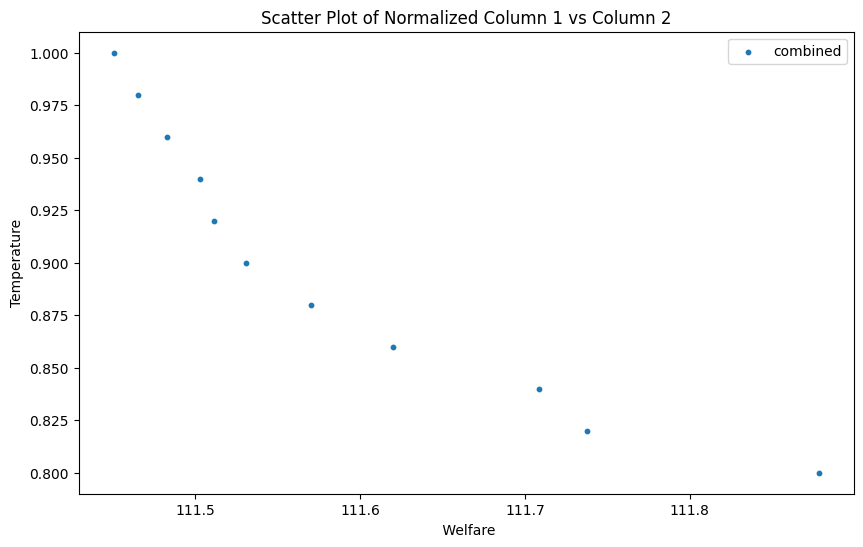

In [5]:
# Read the file 50000.csv in folder nu_50k
import matplotlib.pyplot as plt
from justice.util.enumerations import WelfareFunction, SSP
import pandas as pd



swf = WelfareFunction.UTILITARIAN
nfe = 50_000
ssp = SSP.SSP3

path1 = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"
df1 = pd.read_csv(path1 + f"{swf.value[1]}_reference_set.csv")

# path2 = f"data/temporary/NU_DATA/borg/{str(ssp).split('.')[1]}/"
# df2 = pd.read_csv(path2 + f"{swf.value[1]}_reference_set.csv")

# Select only the lst 2 columns
df1 = df1.iloc[:, -2:]

# Select only the lst 2 columns
# df2 = df2.iloc[:, -2:]



# Make the size of the points larger
plt.figure(figsize=(10, 6))
plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1], s=10, label='combined')
# plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1], s=10, color='red', label='BORG')



plt.legend()

plt.xlabel(' Welfare')
plt.ylabel('Temperature')
plt.title('Scatter Plot of Normalized Column 1 vs Column 2')
plt.show()


# Reference set to policy outcomes

In [ ]:
# Check this method out too: #NOTE ROUGH

from justice.util.output_data_processor import process_scenario

import os
import filecmp
import pandas as pd
from pathlib import Path
import multiprocessing as mp
from functools import partial
from justice.util.enumerations import WelfareFunction, SSP
from justice.util.output_data_processor import process_scenario


if __name__ == "__main__":
    ######################################
    scenario_list = ["SSP245"]

    social_welfare_function = WelfareFunction.PRIORITARIAN
    nfe = 50_000
    ssp = SSP.SSP2

    sw_name = social_welfare_function.value[1]
    path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"
    filename = f"{sw_name}_reference_set.csv"

    # Print the selected policy indices values of last 4 columns
    # Find the min and max welfare values for utilitarian and prioritarian
    loaded_df = pd.read_csv(path + filename)
    policy_indices = list(range(len(loaded_df)))

    sw_name = social_welfare_function.value[1]

    filename = f"{sw_name}_reference_set.csv"

    loaded_df = pd.read_csv(path + filename)
    print(f"Loading data for {sw_name} from {path+filename}")
    print("Selected policy‑indices last 2 columns:")
    print(loaded_df.iloc[policy_indices, -2:])

    # spawn‐based pool so that each worker is a fresh interpreter
    mp.set_start_method("spawn")
    # Bind the fixed arguments swf and policy_indices to process_scenario
    bound_process_scenario = partial(
        process_scenario, social_welfare_function, policy_indices
    )
    with mp.Pool(processes=len(scenario_list)) as pool:
        pool.map(bound_process_scenario, scenario_list)


#### Reevaluation 

###### Run nu_analysis.py - Parallelizes the process over the scenarios
###### Only after running nu_analysis.py, the data is available analysis

In [1]:
import pandas as pd
from pathlib import Path

from justice.util.enumerations import WelfareFunction, SSP
import h5py
from justice.util.output_data_processor import generate_reference_set_policy_mapping
import pandas as pd
from pathlib import Path


nfe = 50_000
ssp = SSP.SSP2



path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"
# Example usage
# 1) Set up paths & scenarios
swf           = WelfareFunction.PRIORITARIAN
base_dir      = Path(path)
saving       = True

scenario_list = ["SSP126","SSP245","SSP370","SSP460","SSP534"]

mapping = generate_reference_set_policy_mapping(
    swf=swf,
    data_root=base_dir,
    scenario_list=scenario_list,
    saving=saving,
    output_directory="mapping",
    delete_loaded_files= True,  # Set to True to delete the loaded files after processing
)

/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Found 9 policies (0 to 8)
All files loaded successfully.
Wrote mapping to data/temporary/NU_DATA/combined/SSP2/mapping/mapping_PRIORITARIAN.h5
Deleting loaded CSV files...
Deleted file: data/temporary/NU_DATA/combined/SSP2/0_SSP126_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP2/0_SSP245_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP2/0_SSP370_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP2/0_SSP460_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP2/0_SSP534_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP2/1_SSP126_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP2/1_SSP245_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP2/1_SSP370_PRIORITARIAN_global_temperature_.csv
Deleted file: data/temporary/NU_DATA/combined/SSP2/1

#### Read the mapping data

In [2]:
import h5py
from pathlib import Path
from justice.util.enumerations import WelfareFunction, SSP
from justice.util.output_data_processor import read_reference_set_policy_mapping


# Example usage

swf           = WelfareFunction.PRIORITARIAN
ssp = SSP.SSP2
path = f"data/temporary/NU_DATA/combined/{str(ssp).split('.')[1]}/"

# base_dir      = Path(path)


mapping = read_reference_set_policy_mapping(path, swf.value[1], mapping_subdir="mapping", hdf5_filename_template="mapping_{}.h5")
# Example to access the mapping
print(mapping[0]["SSP534"]["utilitarian_welfare"])

print(mapping[0]['fraction_above_threshold'])

[-98.13660416 -97.92886322 -98.29999179 ... -98.13745597 -98.06694069
 -98.29892333]
0.32


##### Compute 90th percentile regret